<a href="https://colab.research.google.com/github/trongthuan205/DS102.K21/blob/master/10_PCA_Wines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/trongthuan205/DS102.K21.git DS102.K21

fatal: destination path 'DS102.K21' already exists and is not an empty directory.


# 0 . Import library

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# 1 . Preprocessing data

In [0]:
dataset = pd.read_csv('DS102.K21/Wine.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [0]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
# Feature Scaling
SC = StandardScaler()
X_train_sc = SC.fit_transform(X_train)
X_test_sc = SC.fit_transform(X_test)

# 2 . Demensionality reduction


In [0]:
# Applying PCA
pca = PCA(n_components = 2)
X_train_sc_pca = pca.fit_transform(X_train_sc)
X_test_sc_pca = pca.transform(X_test_sc)

In [7]:
information_gain_ratio = pca.explained_variance_ratio_
print(information_gain_ratio)

[0.36884109 0.19318394]


In [8]:
print(sum(information_gain_ratio))

0.562025035922731


In [9]:
eigen_values = pca.singular_values_
print(eigen_values)

[26.09369    18.88432045]


In [10]:
eigen_vectors = pca.components_
print(eigen_vectors.shape)
print(eigen_vectors)

(2, 13)
[[ 0.12959991 -0.24464064 -0.01018912 -0.24051579  0.12649451  0.38944115
   0.42757808 -0.30505669  0.30775255 -0.11027186  0.30710508  0.37636185
   0.2811085 ]
 [-0.49807323 -0.23168482 -0.31496874  0.02321825 -0.25841951 -0.1006849
  -0.02097952 -0.0399057  -0.06746036 -0.53087111  0.27161729  0.16071181
  -0.36547344]]


In [11]:
print(X_train[:3])
print(X_train_sc_pca[:3])

[[1.369e+01 3.260e+00 2.540e+00 2.000e+01 1.070e+02 1.830e+00 5.600e-01
  5.000e-01 8.000e-01 5.880e+00 9.600e-01 1.820e+00 6.800e+02]
 [1.269e+01 1.530e+00 2.260e+00 2.070e+01 8.000e+01 1.380e+00 1.460e+00
  5.800e-01 1.620e+00 3.050e+00 9.600e-01 2.060e+00 4.950e+02]
 [1.162e+01 1.990e+00 2.280e+00 1.800e+01 9.800e+01 3.020e+00 2.260e+00
  1.700e-01 1.350e+00 3.250e+00 1.160e+00 2.960e+00 3.450e+02]]
[[-2.17884511 -1.07218467]
 [-1.80819239  1.57822344]
 [ 1.09829474  2.22124345]]


# 3 . Training model

In [12]:
log_reg = LogisticRegression(random_state = 0)
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
pca_log_reg = LogisticRegression(random_state = 0)
pca_log_reg.fit(X_train_sc_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# 4 . Evaluating model

Train data

[[44  1  0]
 [ 0 54  1]
 [ 0  0 42]]


Text(0.5, 1.0, 'Confusion matrix in Train data')

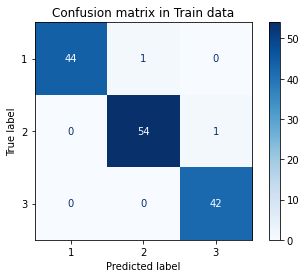

In [14]:
cm = confusion_matrix(y_train, log_reg.predict(X_train))
print(cm)
plot_confusion_matrix(log_reg, X_train, y_train, cmap = 'Blues')
plt.title('Confusion matrix in Train data')

In [15]:
print(classification_report(y_train, log_reg.predict(X_train)))

              precision    recall  f1-score   support

           1       1.00      0.98      0.99        45
           2       0.98      0.98      0.98        55
           3       0.98      1.00      0.99        42

    accuracy                           0.99       142
   macro avg       0.99      0.99      0.99       142
weighted avg       0.99      0.99      0.99       142



[[43  2  0]
 [ 2 52  1]
 [ 0  0 42]]


Text(0.5, 1.0, 'Confusion matrix in Train data (PCA)')

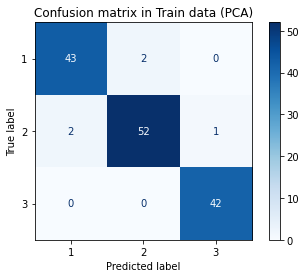

In [16]:
cm = confusion_matrix(y_train, pca_log_reg.predict(X_train_sc_pca))
print(cm)
plot_confusion_matrix(pca_log_reg, X_train_sc_pca, y_train, cmap = 'Blues')
plt.title('Confusion matrix in Train data (PCA)')

In [17]:
print(classification_report(y_train, pca_log_reg.predict(X_train_sc_pca)))

              precision    recall  f1-score   support

           1       0.96      0.96      0.96        45
           2       0.96      0.95      0.95        55
           3       0.98      1.00      0.99        42

    accuracy                           0.96       142
   macro avg       0.97      0.97      0.97       142
weighted avg       0.96      0.96      0.96       142



Test data

[[13  1  0]
 [ 1 14  1]
 [ 0  0  6]]


Text(0.5, 1.0, 'Confusion matrix in Test data')

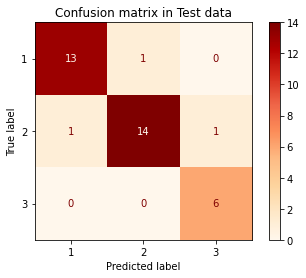

In [18]:
cm = confusion_matrix(y_test, log_reg.predict(X_test))
print(cm)
plot_confusion_matrix(log_reg, X_test, y_test, cmap = 'OrRd')
plt.title('Confusion matrix in Test data')

In [19]:
print(classification_report(y_test, log_reg.predict(X_test)))

              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.93      0.88      0.90        16
           3       0.86      1.00      0.92         6

    accuracy                           0.92        36
   macro avg       0.91      0.93      0.92        36
weighted avg       0.92      0.92      0.92        36



[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


Text(0.5, 1.0, 'Confusion matrix in Test data (PCA)')

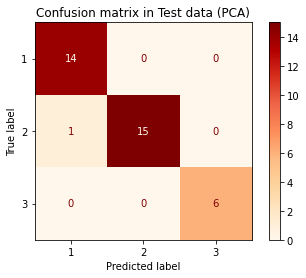

In [20]:
cm = confusion_matrix(y_test, pca_log_reg.predict(X_test_sc_pca))
print(cm)
plot_confusion_matrix(pca_log_reg, X_test_sc_pca, y_test, cmap = 'OrRd')
plt.title('Confusion matrix in Test data (PCA)')

In [21]:
print(classification_report(y_test, pca_log_reg.predict(X_test_sc_pca)))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



# 5 . Visualize data

In [0]:
def VisualizingDataset(X_, y_):
    X1 = X_[:,0]
    X2 = X_[:,1]
    for i, label in enumerate(np.unique(y_)):
        plt.scatter(X1[y_ == label], X2[y_ == label], color = ListedColormap(('red', 'green', 'blue'))(i), label = label)
    plt.legend()

In [0]:
def VisualizingResult(model, X_):
    X1 = X_[:,0]
    X2 = X_[:,1]
    X1_range = np.arange(X1.min()-1, X1.max()+1, 0.01)
    X2_range = np.arange(X2.min()-1, X2.max()+1, 0.01)
    X1_matrix, X2_matrix = np.meshgrid(X1_range, X2_range)
    X_grid = np.array([X1_matrix.ravel(), X2_matrix.ravel()]).T
    y_grid = model.predict(X_grid).reshape(X1_matrix.shape)
    plt.contourf(X1_matrix, X2_matrix, y_grid, alpha = 0.5, cmap = ListedColormap(('red','green', 'blue')))

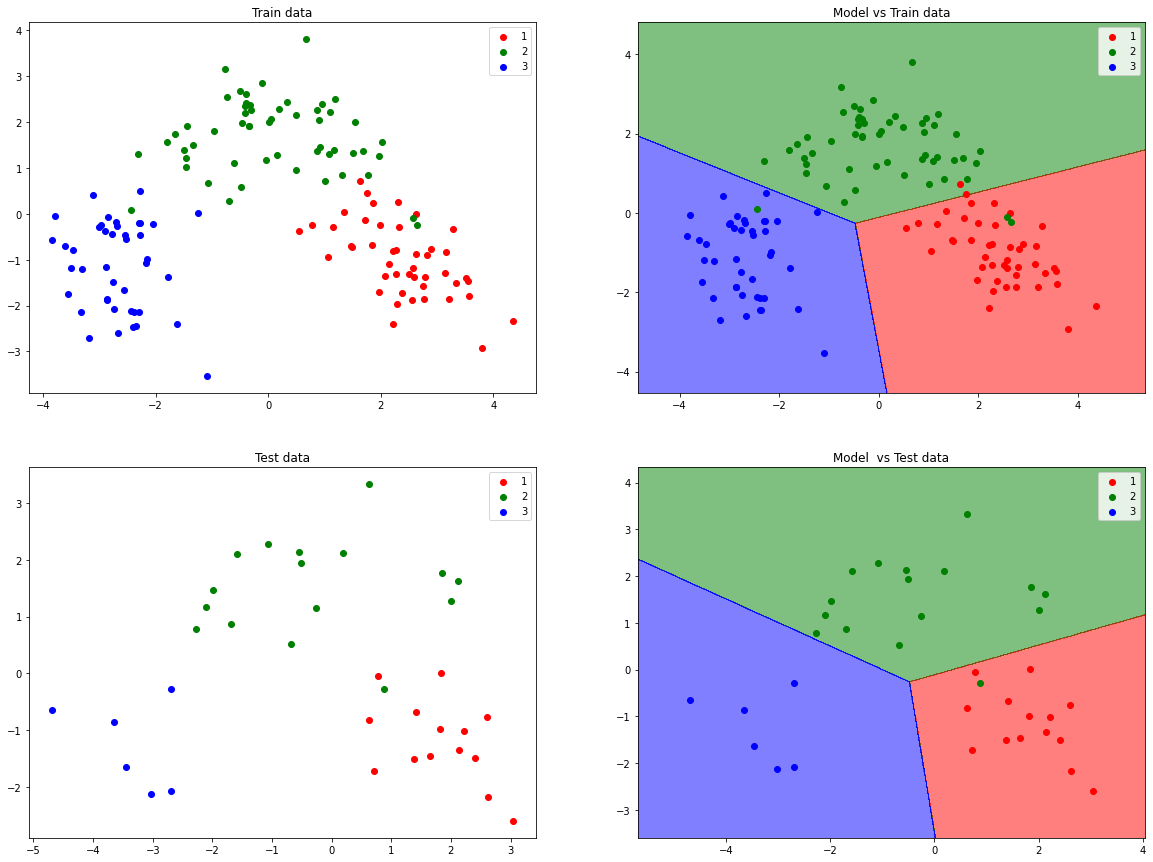

In [24]:
plt.figure(figsize = (20,15))
plt.subplot(2,2,1)
VisualizingDataset(X_train_sc_pca, y_train)
plt.title('Train data')
plt.subplot(2,2,2)
VisualizingResult(pca_log_reg, X_train_sc_pca)
VisualizingDataset(X_train_sc_pca, y_train)
plt.title('Model vs Train data')
plt.subplot(2,2,3)
VisualizingDataset(X_test_sc_pca, y_test)
plt.title('Test data')
plt.subplot(2,2,4)
VisualizingResult(pca_log_reg, X_test_sc_pca)
VisualizingDataset(X_test_sc_pca, y_test)
plt.title('Model  vs Test data')
plt.show()